In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pakistan-crop-production-and-yield-data19612023/FAOSTAT_data_en_9-7-2025.csv


## Importing Libraries

In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Reading the dataset from Kaggle

In [96]:
df = pd.read_csv('/kaggle/input/pakistan-crop-production-and-yield-data19612023/FAOSTAT_data_en_9-7-2025.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,586,Pakistan,5412,Yield,112.0,Maize (corn),1961,1961,kg/ha,1030.9,A,Official figure,NaN
1,QCL,Crops and livestock products,586,Pakistan,5510,Production,112.0,Maize (corn),1961,1961,t,487680.0,A,Official figure,NaN
2,QCL,Crops and livestock products,586,Pakistan,5412,Yield,112.0,Maize (corn),1962,1962,kg/ha,1052.5,A,Official figure,NaN
3,QCL,Crops and livestock products,586,Pakistan,5510,Production,112.0,Maize (corn),1962,1962,t,482600.0,A,Official figure,NaN
4,QCL,Crops and livestock products,586,Pakistan,5412,Yield,112.0,Maize (corn),1963,1963,kg/ha,1052.2,A,Official figure,NaN


## Filtering Irrelvant Attributes

- Domain Code and domain are irrelevant and non unique
- Area and Area Code are irrelevant and non unique
- Note is Null for most of the Dataset
- Year Code and Year are related hence Year Code was dropped
- Element Code and Year are related hence Element was dropped
- Same for Item code
- Flag Description and Flag are same

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


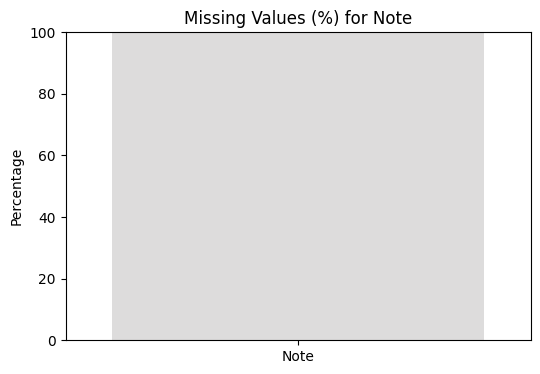

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Column mostly null
col = 'Note'

missing_percent = df[col].isnull().mean() * 100

plt.figure(figsize=(6,4))
sns.barplot(x=[col], y=[missing_percent], palette="coolwarm")
plt.title(f'Missing Values (%) for {col}')
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


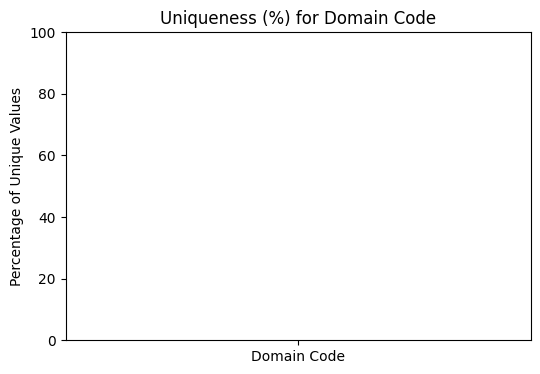

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


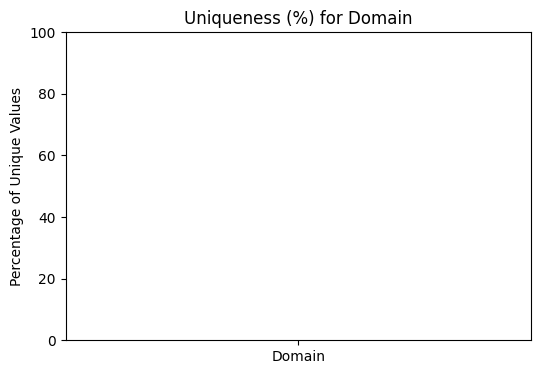

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


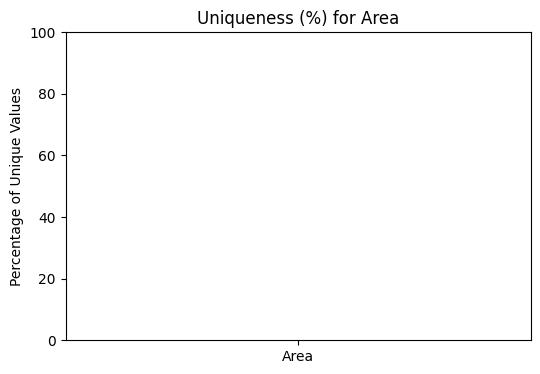

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


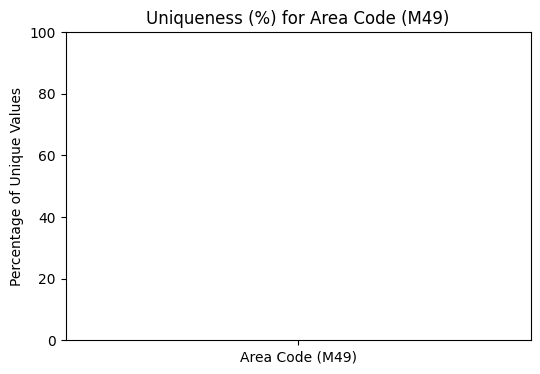

In [110]:
cols_non_unique = ['Domain Code', 'Domain', "Area", "Area Code (M49)"]

for col in cols_non_unique:
    unique_percent = df[col].nunique() / len(df) * 100
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=[col], y=[unique_percent], palette="magma")
    plt.title(f'Uniqueness (%) for {col}')
    plt.ylim(0,100)
    plt.ylabel('Percentage of Unique Values')
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


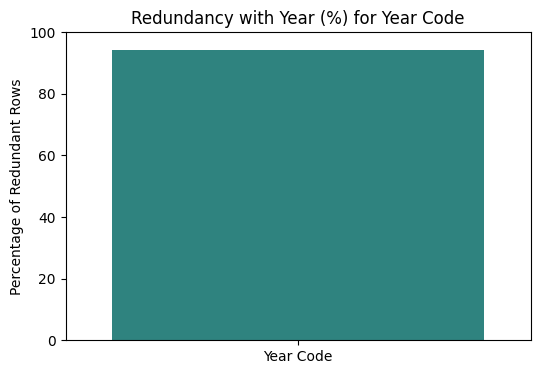

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


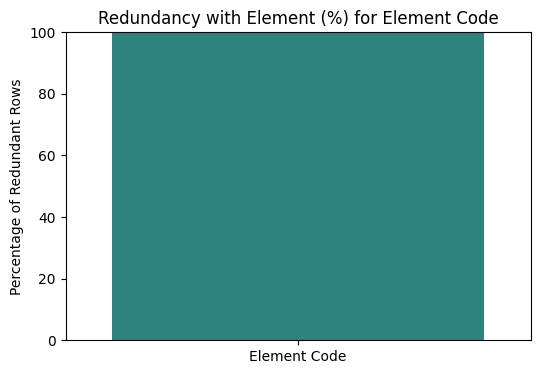

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


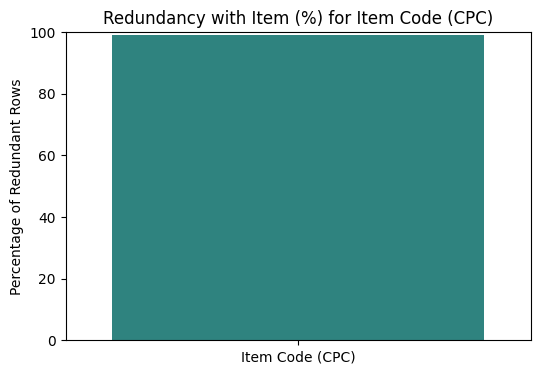

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


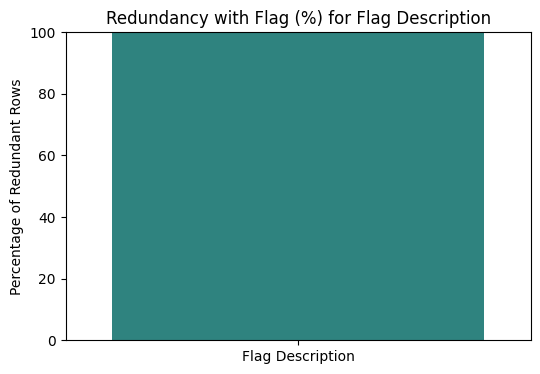

In [111]:
redundant_pairs = {
    'Year Code': 'Year',
    'Element Code': 'Element',
    'Item Code (CPC)': 'Item',
    'Flag Description': 'Flag'
}

for col, related_col in redundant_pairs.items():
    unique_comb = df[[col, related_col]].drop_duplicates().shape[0]
    total_rows = len(df)
    redundancy_percent = 100 - (unique_comb / total_rows * 100)
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=[col], y=[redundancy_percent], palette="viridis")
    plt.title(f'Redundancy with {related_col} (%) for {col}')
    plt.ylim(0,100)
    plt.ylabel('Percentage of Redundant Rows')
    plt.show()


In [97]:
df_dropped_irrelevant = df.drop(columns=['Domain Code', 'Domain', "Area", "Area Code (M49)", "Note", "Year Code", "Element Code", "Item Code (CPC)", "Flag Description"])

In [98]:
df_yeild = df_dropped_irrelevant[df_dropped_irrelevant['Element'] == "Yield"]

In [99]:
final_df = df_yeild.drop("Element", axis=1)

## One Hot Encoding Object Variables

Since object variable cannot be used by the selected machine learning model we will use One Hot Encoding

In [100]:
final_df = pd.get_dummies(final_df, columns = ["Item", "Unit", "Flag"])

## Seperate Training and Target Variable

In [101]:
X = final_df.drop("Value", axis=1)
y = final_df["Value"]

In [102]:
X

,Year,Item_Maize (corn),Item_Other pulses n.e.c.,Item_Potatoes,Item_Rice,"Item_Seed cotton, unginned",Item_Sorghum,Item_Sunflower seed,Item_Tomatoes,Item_Wheat,Unit_kg/ha,Flag_A,Flag_E
0,1961,True,False,False,False,False,False,False,False,False,True,True,False
2,1962,True,False,False,False,False,False,False,False,False,True,True,False
4,1963,True,False,False,False,False,False,False,False,False,True,True,False
6,1964,True,False,False,False,False,False,False,False,False,True,True,False
8,1965,True,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,2019,False,False,False,False,False,False,False,False,True,True,True,False
1107,2020,False,False,False,False,False,False,False,False,True,True,True,False
1109,2021,False,False,False,False,False,False,False,False,True,True,True,False
1111,2022,False,False,False,False,False,False,False,False,True,True,True,False


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=15, 
    shuffle=True, 
    train_size=0.8
)

In [105]:
rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    random_state=15,       # for reproducibility
    n_jobs=-1              # use all CPU cores
)

In [106]:
# 2. Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=15)

In [107]:
# 3. Make predictions
y_pred = rf.predict(X_test)

# 4. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # root mean squared error
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Results:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Random Forest Regressor Results:
Mean Squared Error (MSE): 86861.603
Root Mean Squared Error (RMSE): 294.723
R² Score: 0.993
